In [31]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
digitos = datasets.load_digits()

In [11]:
X = digitos.data
Y = digitos.target

In [12]:
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [13]:
X_treino, testeData, Y_treino, testeLabels = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [14]:
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino, 
                                                                    Y_treino, 
                                                                    test_size = 0.1, 
                                                                    random_state = 84)

In [15]:
# Cálculo da média do dataset de treino
X_norm = np.mean(X, axis = 0)

# Normalização dos dados de treino e de teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = testeData - X_norm

In [16]:
# Range de K - KNN
kVals = range(1, 60, 2)

In [18]:
acuracias = []

In [19]:
for k in kVals:
    
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors = k)
    modeloKNN.fit(treinoData, treinoLabels)
          
    # Avaliando o modelo e atualizando a lista de acurácias
    score = modeloKNN.score(validData, validLabels)
    acuracias.append(score)

In [20]:
i = np.argmax(acuracias)
print("O valor de k = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kVals[i], 
                                                                                             acuracias[i] * 100))

O valor de k = 3 alcançou a mais alta acurácia de 100.00% nos dados de validação!


In [21]:
modeloFinal = KNeighborsClassifier(n_neighbors = kVals[i])

In [22]:
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=3)

In [23]:
predictions = modeloFinal.predict(testeData)

In [24]:
print(confusion_matrix(testeLabels, predictions))

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 54  0  0  0  1  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  1]
 [ 0  0  0  0  0 59  0  0  0  0]
 [ 0  1  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 48]]


In [57]:
image = testeData[85]
prediction = modeloFinal.predict([image])[0]

Eu acredito que esse dígito seja: 2


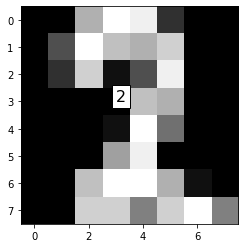

In [58]:
imgdata = np.array(image, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels,cmap='gray')
plt.annotate(prediction,(3,3),bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(prediction))
plt.show()